In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [294]:
df1=pd.read_csv('/content/Coupen.csv')

In [295]:
df1.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# EDA

In [296]:
#shape of data
df1.shape

(12684, 26)

In [297]:
#identifying columns
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [298]:
#basic information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [299]:
#Statistical Informations
df1.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [300]:
#creating a copy of the data
df=df1.copy()

In [301]:
# Checking for null values
df.isnull().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# Null Value Handling

In [302]:
# Identify columns with missing values
missing_cols = df.columns[df.isna().any()].tolist()

In [303]:
# Create a new DataFrame with only the columns that have missing values
df_missing = df[missing_cols]

In [304]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   expiration            12681 non-null  object
 3   maritalStatus         12681 non-null  object
 4   car                   108 non-null    object
 5   Bar                   12577 non-null  object
 6   CoffeeHouse           12467 non-null  object
 7   CarryAway             12531 non-null  object
 8   RestaurantLessThan20  12554 non-null  object
 9   Restaurant20To50      12495 non-null  object
dtypes: object(10)
memory usage: 991.1+ KB


In [305]:
df['destination'].unique()

array(['No Urgent Place', 'Home', 'Work', nan], dtype=object)

In [306]:
df['destination']=df['destination'].ffill()

In [307]:
df['passanger'].unique()


array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner', nan], dtype=object)

In [308]:
df['passanger']

0            Alone
1        Friend(s)
2        Friend(s)
3        Friend(s)
4        Friend(s)
           ...    
12679      Partner
12680        Alone
12681        Alone
12682        Alone
12683        Alone
Name: passanger, Length: 12684, dtype: object

In [309]:
df['passanger']=df['passanger'].ffill()

In [310]:
df['expiration'].unique()

array(['1d', '2h', nan], dtype=object)

In [311]:
df['expiration']

0        1d
1        2h
2        2h
3        2h
4        1d
         ..
12679    1d
12680    1d
12681    1d
12682    1d
12683    2h
Name: expiration, Length: 12684, dtype: object

In [312]:
df['expiration']=df['expiration'].ffill()

In [313]:
df['expiration'].unique()

array(['1d', '2h'], dtype=object)

In [314]:
df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', nan, 'Divorced',
       'Widowed'], dtype=object)

In [315]:
df['maritalStatus']

0        Unmarried partner
1        Unmarried partner
2        Unmarried partner
3        Unmarried partner
4        Unmarried partner
               ...        
12679               Single
12680               Single
12681               Single
12682               Single
12683               Single
Name: maritalStatus, Length: 12684, dtype: object

In [316]:
df['maritalStatus']=df['maritalStatus'].ffill()

In [317]:
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', nan, '4~8'], dtype=object)

In [318]:
df['Bar']

0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: Bar, Length: 12684, dtype: object

In [319]:
df['Bar']=df['Bar'].ffill()

In [320]:
df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', nan], dtype=object)

In [321]:
df['CoffeeHouse']

0        never
1        never
2        never
3        never
4        never
         ...  
12679    never
12680    never
12681    never
12682    never
12683    never
Name: CoffeeHouse, Length: 12684, dtype: object

In [322]:
df['CoffeeHouse']=df['CoffeeHouse'].ffill()

In [323]:
df['CarryAway'].unique()

array([nan, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [324]:
df['CarryAway']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
12679    1~3
12680    1~3
12681    1~3
12682    1~3
12683    1~3
Name: CarryAway, Length: 12684, dtype: object

In [325]:
df['CarryAway']=df['CarryAway'].bfill()

In [326]:
df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', nan, 'never'], dtype=object)

In [327]:
df['RestaurantLessThan20']

0        4~8
1        4~8
2        4~8
3        4~8
4        4~8
        ... 
12679    4~8
12680    4~8
12681    4~8
12682    4~8
12683    4~8
Name: RestaurantLessThan20, Length: 12684, dtype: object

In [328]:
df['RestaurantLessThan20']=df['RestaurantLessThan20'].ffill()

In [329]:
df['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8', nan], dtype=object)

In [330]:
df['Restaurant20To50']

0        1~3
1        1~3
2        1~3
3        1~3
4        1~3
        ... 
12679    1~3
12680    1~3
12681    1~3
12682    1~3
12683    1~3
Name: Restaurant20To50, Length: 12684, dtype: object

In [331]:
df['Restaurant20To50']=df['Restaurant20To50'].ffill()


In [332]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [333]:
#In this column majority of datas are missing so desided to drop it
df.drop('car', axis=1, inplace=True)

In [334]:
df.shape

(12684, 25)

In [335]:
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# Outlier Handling

In [336]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,55,1,1,0,0,0,1,1
1,80,1,1,0,0,0,1,0
2,80,1,1,1,0,0,1,1
3,80,1,1,1,0,0,1,0
4,80,1,1,1,0,0,1,0


<Axes: ylabel='temperature'>

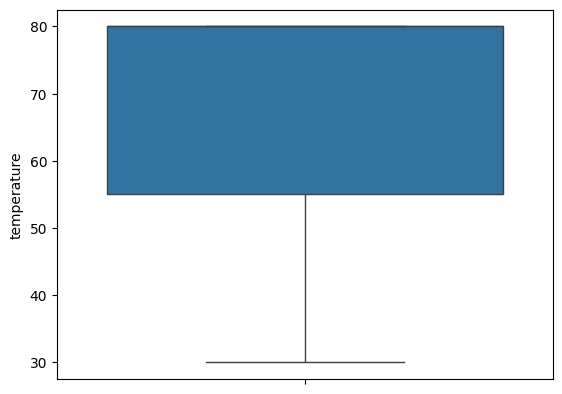

In [337]:
# List of columns you want to plot
sns.boxplot(df['temperature'])

No outliers detected

In [338]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

In [339]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

In [340]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix
corr = numeric_data.corr()

# Display the correlation matrix
corr

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.155332,0.078211,NaN,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,NaN,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,NaN,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,NaN,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,NaN,-0.081602,-0.103633,0.014570,-0.014570,1.000000


In [341]:
df['toCoupon_GEQ5min'].value_counts()

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

In [342]:
#All unique values so dropped the column
df=df.drop('toCoupon_GEQ5min', axis=1)

In [343]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the Pearson correlation matrix
corr = numeric_data.corr()

# Display the correlation matrix
corr

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.019716,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ15min,-0.155332,0.078211,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,0.303533,0.192319,-1.000000,1.000000,-0.014570
Y,0.061240,-0.045557,-0.081602,-0.103633,0.014570,-0.014570,1.000000


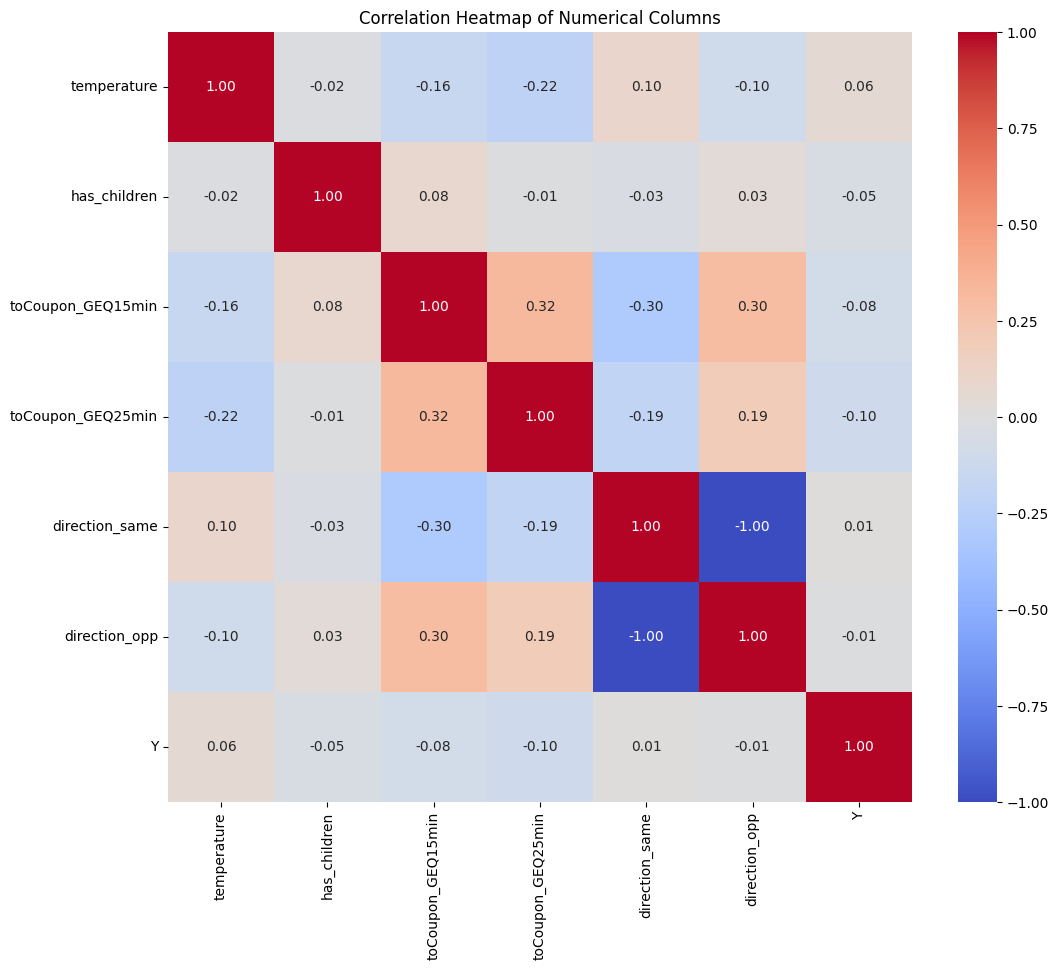

In [344]:
# Set the size of the heatmap
plt.figure(figsize=(12, 10))  # Adjust the size as needed

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Set the title
plt.title('Correlation Heatmap of Numerical Columns')

# Display the heatmap
plt.show()

# Encoding

In [345]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,never,4~8,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,4~8,1~3,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,4~8,4~8,1~3,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,4~8,1~3,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,4~8,1~3,1,0,0,1,0


In [369]:
col_obj=df.select_dtypes(include='object').columns
col_obj

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'maritalStatus', 'education', 'occupation', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [347]:
df['destination'].unique()

array(['No Urgent Place', 'Home', 'Work'], dtype=object)

In [348]:
df['passanger'].unique()

array(['Alone', 'Friend(s)', 'Kid(s)', 'Partner'], dtype=object)

In [349]:
df['weather'].unique()

array(['Sunny', 'Rainy', 'Snowy'], dtype=object)

In [350]:
df['time'].unique()

array(['2PM', '10AM', '6PM', '7AM', '10PM'], dtype=object)

In [351]:
# Create a mapping of time values to numerical hours
time_mapping = {
    '7AM': 7,
    '10AM': 10,
    '2PM': 14,
    '6PM': 18,
    '10PM': 22
}

# Apply the mapping to the 'time' column
df['time'] = df['time'].map(time_mapping)

# Verify the transformation
print(data['time'].unique())

[14 10 18  7 22]


In [368]:
df['time'] = df['time'].astype(float)

In [352]:
df[ 'coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [353]:
df['expiration'].unique()

array(['1d', '2h'], dtype=object)

In [354]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [355]:
df['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [356]:
# Create a mapping of age categories to numerical values
age_mapping = {
    'below21': 20,  # Assigning a value like 20 for 'below21'
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50  # Assigning a value like 50 for '50plus'
}

# Apply the mapping to the 'age' column
df['age'] = df['age'].map(age_mapping)

# Verify the transformation
print(df['age'].unique())

[21 46 26 31 41 50 36 20]


In [357]:
df['age'] = df['age'].astype(int)

In [358]:
df['maritalStatus'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [359]:
df['education'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

In [360]:
df['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [361]:
df['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [362]:
# Create a mapping of income ranges to numerical values
income_mapping = {
    '$37500 - $49999': 43750,  # Midpoint of the range
    '$62500 - $74999': 68750,
    '$12500 - $24999': 18750,
    '$75000 - $87499': 81250,
    '$50000 - $62499': 56250,
    '$25000 - $37499': 31250,
    '$100000 or More': 100000,  # Representative value for "$100000 or More"
    '$87500 - $99999': 93750,
    'Less than $12500': 12500   # Representative value for "Less than $12500"
}

# Apply the mapping to the 'income' column
df['income'] = df['income'].map(income_mapping)

# Convert the 'income' column to integer type (if necessary)
df['income'] = df['income'].astype(int)

In [363]:
df['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [364]:
df['CoffeeHouse'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8'], dtype=object)

In [365]:
df['CarryAway'].unique()

array(['4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [366]:
df['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [367]:
df['Restaurant20To50'].unique()

array(['1~3', 'less1', 'never', 'gt8', '4~8'], dtype=object)

In [370]:
col_obj=df.select_dtypes(include='object').columns
col_obj

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'maritalStatus', 'education', 'occupation', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')

In [371]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [372]:
from category_encoders import BinaryEncoder

In [373]:
# Create a BinaryEncoder instance for the 'income' column
encoder = BinaryEncoder(cols=col_obj)

# Fit and transform the 'income' column
data_encoded = encoder.fit_transform(df)

# Verify the transformation
print(data_encoded.head())

   destination_0  destination_1  passanger_0  passanger_1  passanger_2  \
0              0              1            0            0            1   
1              0              1            0            1            0   
2              0              1            0            1            0   
3              0              1            0            1            0   
4              0              1            0            1            0   

   weather_0  weather_1  temperature  time  coupon_0  ...  \
0          0          1           55  14.0         0  ...   
1          0          1           80  10.0         0  ...   
2          0          1           80  10.0         0  ...   
3          0          1           80  14.0         0  ...   
4          0          1           80  14.0         0  ...   

   RestaurantLessThan20_1  RestaurantLessThan20_2  Restaurant20To50_0  \
0                       0                       1                   0   
1                       0                 

In [374]:
data_encoded.head()

,destination_0,destination_1,passanger_0,passanger_1,passanger_2,weather_0,weather_1,temperature,time,coupon_0,...,RestaurantLessThan20_1,RestaurantLessThan20_2,Restaurant20To50_0,Restaurant20To50_1,Restaurant20To50_2,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0,1,0,0,1,0,1,55,14.0,0,...,0,1,0,0,1,0,0,0,1,1
1,0,1,0,1,0,0,1,80,10.0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,0,1,0,0,1,80,10.0,0,...,0,1,0,0,1,1,0,0,1,1
3,0,1,0,1,0,0,1,80,14.0,0,...,0,1,0,0,1,1,0,0,1,0
4,0,1,0,1,0,0,1,80,14.0,0,...,0,1,0,0,1,1,0,0,1,0


In [376]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [389]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('Y', axis=1)
y = data_encoded['Y']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(10147, 49) (2537, 49) (10147,) (2537,)


In [390]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection

In [391]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


In [392]:

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
model_performance = {}

for model_name, model in models.items():
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[model_name] = {
        'Cross-Validation Score': scores.mean(),
        'Test Accuracy': accuracy
    }

# Print model performance
for model_name, performance in model_performance.items():
    print(f"{model_name}:")
    print(f"    Cross-Validation Score: {performance['Cross-Validation Score']:.4f}")
    print(f"    Test Accuracy: {performance['Test Accuracy']:.4f}\n")

Logistic Regression:
    Cross-Validation Score: 0.6814
    Test Accuracy: 0.6717

K-Nearest Neighbors:
    Cross-Validation Score: 0.6720
    Test Accuracy: 0.6752

Support Vector Machine:
    Cross-Validation Score: 0.7347
    Test Accuracy: 0.7257

Decision Tree:
    Cross-Validation Score: 0.6701
    Test Accuracy: 0.6776

Random Forest:
    Cross-Validation Score: 0.7461
    Test Accuracy: 0.7395

Gradient Boosting:
    Cross-Validation Score: 0.7180
    Test Accuracy: 0.7107



Based on the evaluation results, the Random Forest model has the highest cross-validation score and test accuracy, indicating it performs the best among the models tested.

In [394]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Hyper Prameter Tuning using GridSearchCV

In [395]:

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy of the best Random Forest model: {accuracy}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

# Model

In [396]:


# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7394560504532913
Confusion Matrix:
[[ 743  385]
 [ 276 1133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1128
           1       0.75      0.80      0.77      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537

